<a href="https://colab.research.google.com/github/Spydy-Coder/Wine_Quality/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
df=pd.read_csv('/content/drive/MyDrive/wine_dataset.csv')
print("Number of rows and columns:")
print(df.shape)
df.head()

Number of rows and columns:
(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null values in the dataset.


In [54]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [55]:
df.describe()['quality']

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

#**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


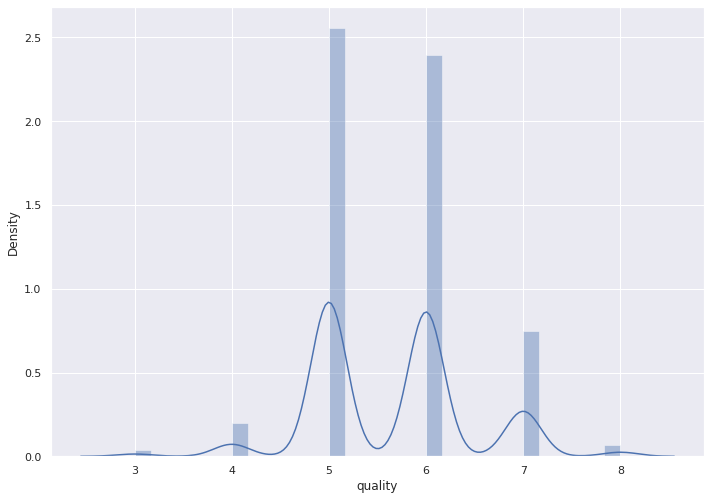

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['quality'], bins=30)
plt.show()

In [57]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [58]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

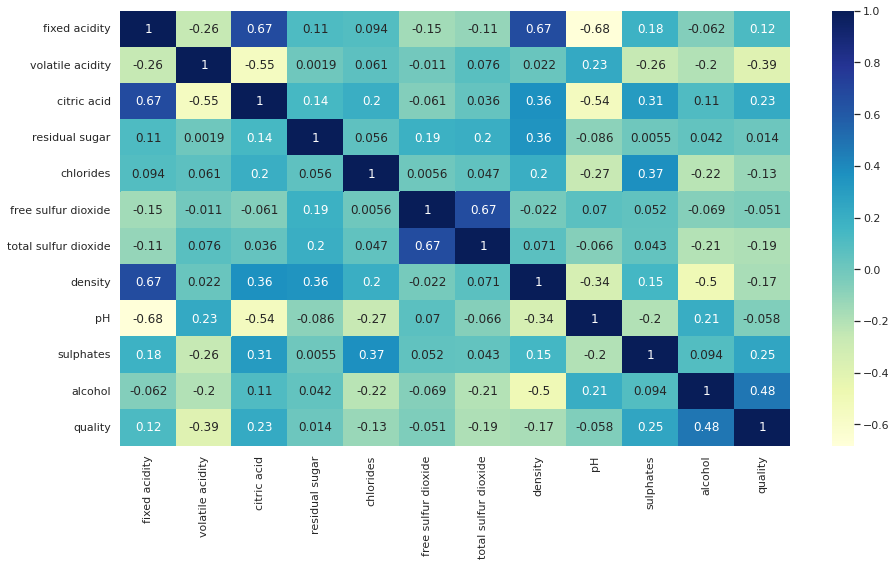

In [59]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

quality and alcohol has a good relationship.
density and fixed aciddity , citric acid and fixed acidity, total sulfur dioxide and free sulphur dioxide have good relationship.

#**Data Visualisation**

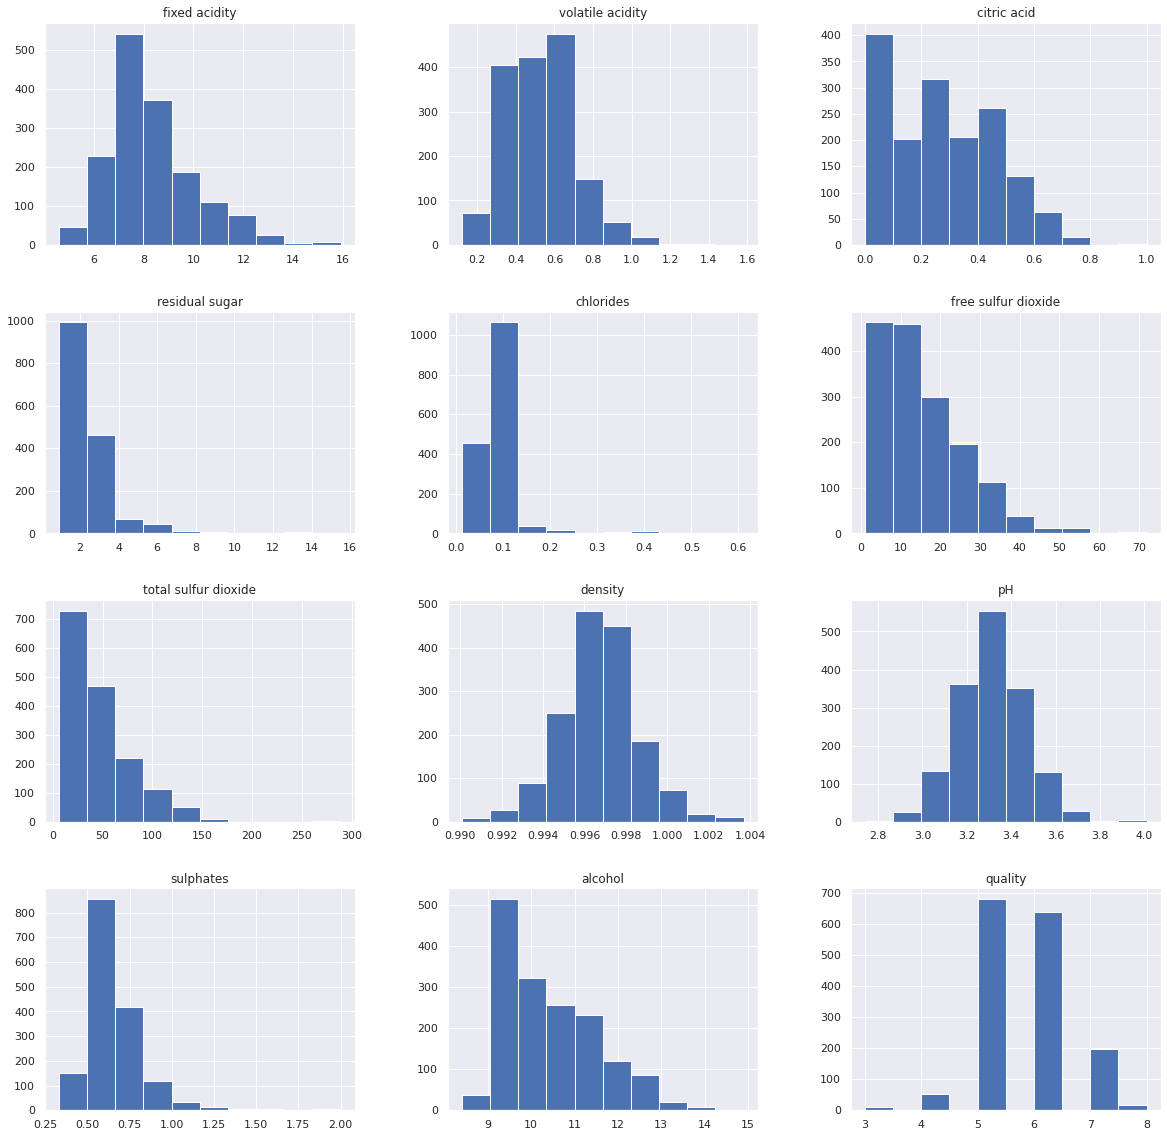

In [60]:
df.hist(bins=10,figsize=(20,20))
plt.show()

Text(0, 0.5, 'alcohol')

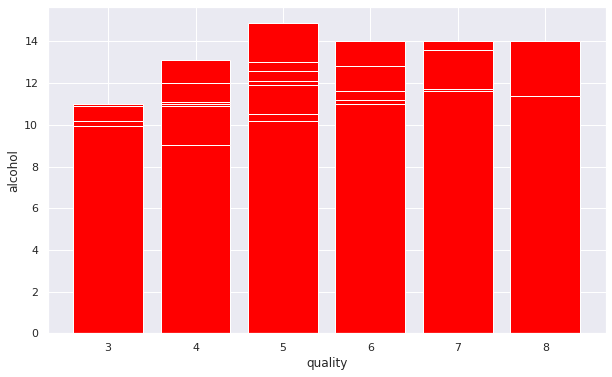

In [61]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

#**Feature Selection**

I defined that I will consider a wine of good quality only when it's quality is greater than or equal to 7.

In [62]:
df['goodquality']=[1 if x>=7 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'],axis=1)
y = df['goodquality']

In [63]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [64]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [65]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0


#**Standardising feature variables**

In [66]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#**Split data**

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


#**Modelling**

***Logistic Regression***

In [68]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

lin_model = LogisticRegression()
lin_model.fit(X_train, y_train)

LogisticRegression()

**Testing and Evaluaton**

In [69]:
# for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
train_accuracy = lin_model.score(X_train,y_train)

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Training Accuracy:",train_accuracy*100)
print("\n")

# for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
test_accuracy= lin_model.score(X_test,y_test)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Testing Accuracy:",test_accuracy*100)


The model performance for training set
RMSE is 0.3558952855281192
R2 score is -0.014661808779455665
Training Accuracy: 87.33385457388584


The model performance for testing set
RMSE is 0.3112474899497183
R2 score is -0.14022988505747125
Testing Accuracy: 90.3125


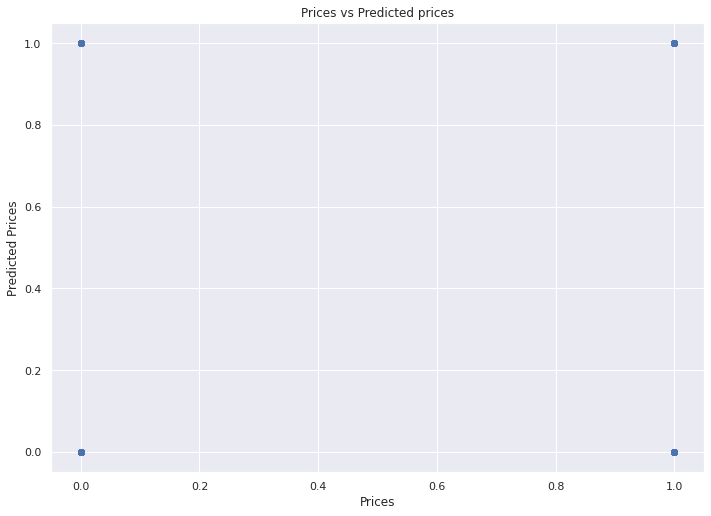

In [70]:
plt.scatter(y_train,y_train_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()

***Random Forest Classifier***

In [71]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
fit_rnd = rnd.fit(X_train,y_train)


**Testing and Evaluation**

In [72]:
# for training set
y_train_predict1 = rnd.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(y_train, y_train_predict1)))
rnd_score1 = r2_score(y_train, y_train_predict1)
train_accuracy1 = rnd.score(X_train,y_train)

print("The model performance for training set")
print('RMSE is {}'.format(rmse1))
print('R2 score is {}'.format(rnd_score1))
print("Training Accuracy:",train_accuracy1*100)
print("\n")

# for testing set
y_test_predict1 = rnd.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(y_test, y_test_predict1)))
rnd_score2 = r2_score(y_test, y_test_predict1)
test_accuracy1= rnd.score(X_test,y_test)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(rnd_score2))
print("Testing Accuracy:",test_accuracy1*100)


The model performance for training set
RMSE is 0.0
R2 score is 1.0
Training Accuracy: 100.0


The model performance for testing set
RMSE is 0.25617376914899
R2 score is 0.22758620689655173
Testing Accuracy: 93.4375


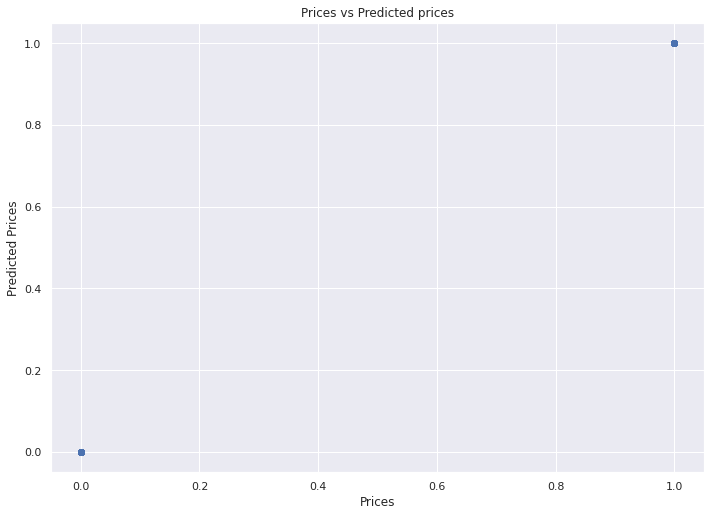

In [73]:
plt.scatter(y_train,y_train_predict1)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [74]:
predicted_df =  {'predicted_values': y_test_predict1,'original_values':y_test}
#creating new data frame
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
1109,0,0
1032,0,0
1002,1,1
487,0,0
979,0,0
1054,0,0
542,0,0
853,0,0
1189,0,0
412,0,0


#**Conclusion**

We have used Logistic Regression and Random Forest Classifier on this dataset.
Testing Accuracy of Logistic Regression is 90.3125 % and Testing Accuracy of Random Forest Classifier is 93.75 %. So We conclude that Random Forest Clssifier model is best for this wine_quality dataset. 